# Gradient Descent
## Intuition
Gradient descent aims to numerically find the (local) minimum for a given function. It is often used to optimize loss functions.

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

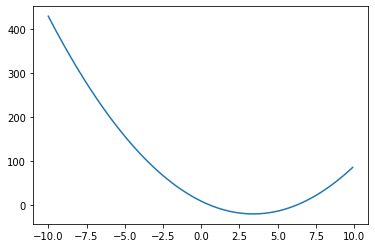

In [7]:
def f(x):
    return 2.5*x**2 - 17*x + 9

x = np.arange(-10,10,0.1)
y = f(x)

plt.plot(x, y)

The function f has a local minimum at $x = 3,4$. It can be analytically calculated. Now let's use Gradient Descent to numerically find it.

Local Minimum found at x = 3.4


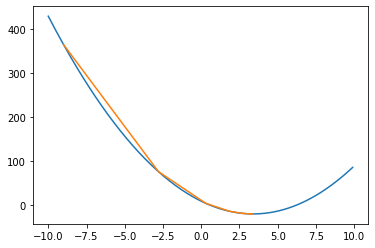

In [25]:
def df_dx(x):
    """ First order derivate of f with respect to x"""
    return 5*x - 17

def gradient_descent(max_iter=1000, learning_rate=0.1):
    steps = [np.random.randint(-20, 20)]
    for _ in range(max_iter):
        x = steps[-1]
        gradient_at_x = df_dx(x)
        x -= gradient_at_x * learning_rate
        steps.append(x)
    return steps

steps = gradient_descent()
print(f"Local Minimum found at x = {steps[-1]}")

x = np.arange(-10,10,0.1)
y = f(x)

plt.plot(x, y)
plt.plot(steps, f(np.array(steps)))

## Usage in Neural Networks
![bild](ANN.png)
Source: https://en.wikipedia.org/wiki/Backpropagation#/media/File:ArtificialNeuronModel_english.png



For a Neural Network like shown above, we want to optimize an error function given as $E = L(t, y)$
where $L$ is a loss function and $t$ is the target value and $y$ is the predicition (aka output of the neuron)    
For each neuron $j$ its ouput is defined as 
$o_j = \varphi(net_j) = \varphi \left( \sum_{k=1}^n w_{kj}o_k \right)$ where $\varphi$ is a differantiable activation function.   
One such function is the sigmoid function:
$\varphi(z) = \frac{1}{1+e^{-z}}$ which has the derivate $\frac{d\varphi(z)}{dz} = \varphi(z)(1-\varphi(z))$  

Calculating the partial derivate of the error with respect to a single weight $w_{ij}$ is done using the chain rule:
$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \frac{\partial o_j}{\partial w_{ij}} = \frac{\partial E}{\partial o_j} \frac{\partial o_j}{\partial net_j} \frac{\partial net_j}{\partial w_{ij}}$

The last factor can now be calculated:
$\frac{\partial net_j}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}} \left( \sum_{k=1}^n w_{kj}o_k  \right) = \frac{\partial}{\partial w_{ij}} w_{ij}o_i = o_i$ (as all other $w_{kj}o_k$ combinations are constants when deriving with respect to $w_{ij}$)

Now:  
$\frac{\partial o_j}{\partial net_j} = \frac{\partial \varphi(net_j)}{\partial net_j}$ which for the afore mentioned sigmoid function is...

$\frac{\partial o_j}{\partial net_j} = \frac{\partial }{\partial net_j} \varphi(net_j) = \varphi(net_j)(1-\varphi(net_j)) = o_j(1-o_j)$

Now lets incorporate the loss function (in this case: *squared error*) by calculating $\frac{\partial E}{\partial o_j}$:  
$\frac{\partial E}{\partial o_j} = \frac{\partial E}{\partial y} = \frac{\partial}{\partial y}\frac{1}{2}(t-y)^2 = y-t$